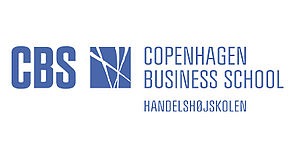

# <font color='Red'>Final Exam Project for: Natural Language Processing and Text Analytics</font> 


## <font color='Blue'>By: Ioannis Antoniou (142000) , and M’hamed Khedraoui Idrissi (142908)</font> 

In [69]:
import numpy as np 
import pandas as pd 
import numpy as np
import pandas as pd 
import nltk
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import warnings
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from matplotlib import pyplot
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score

import nltk
from nltk.corpus import movie_reviews
import random
from prettytable import PrettyTable
import textwrap 
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.model_selection import train_test_split
from prettytable import PrettyTable

In [2]:
missing_values = ["n/a", "na","NA","NaN", "--", "Not Answer","Not_Answer"]

In [3]:
df = pd.read_csv('toxic_reddit_tagged.csv', na_values = missing_values)

In [4]:
df.head()

,Unnamed: 0,comments,tagging
0,1,"i'm from spain, i hate this shit",1
1,6,the funny thing spanish nobility basically inv...,0
2,9,my mother spanish thankfully taught siblings i...,1
3,10,you mean country created spanish language lang...,0
4,11,that's thing ... odds poster isn't aware spain...,1


In [5]:
df.groupby('tagging').describe()

Unnamed: 0                                                            \
             count          mean          std  min     25%      50%      75%   
tagging                                                                        
0           8778.0  12869.029164  7392.241734  6.0  6469.5  12756.5  19467.5   
1           8067.0  13110.559564  7095.640484  1.0  6705.5  13482.0  19238.0   

                  
             max  
tagging           
0        25371.0  
1        25369.0

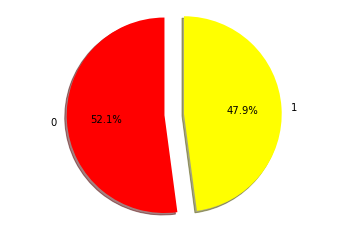

In [6]:
count_Class = pd.value_counts(df.tagging, sort = True)

# Data to Plot
labels = '0', '1'
sizes = [count_Class[0], count_Class[1]]
colors = ['red', 'yellow']
explode = (0.1, 0.1)

# Plot
plt.pie(sizes, explode = explode, labels = labels, colors = colors,
        autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.show()

In [7]:
df.isnull().sum()

Unnamed: 0    0
comments      0
tagging       0
dtype: int64

### Function that prints features with the highest coefficient values, per class

In [8]:

def get_most_informative_features(clf, vectorizer, 
                                  label_names, 
                                  max_number_informative_features):

    output = []

    
    try:
        feature_names = vectorizer.get_feature_names()

        label_index = len(label_names)
        
        if label_index == 2:
            label_index = 1
            #print('features for binary classification!')
        
        for index in range(label_index):
            #print(str(index) + label_names[index])
            #print('clf.coef_:',len(clf.coef_))
            
            output.append('\n' + label_names[index] + ':\n')
            
            coefs_with_fns = sorted(zip(clf.coef_[index], feature_names))
            
            #print(coefs_with_fns)
            
            threshold = int(max_number_informative_features / 2)

            top = zip(coefs_with_fns[:threshold],
                      coefs_with_fns[:-(threshold + 1):-1])
            
            for (coef_1, fn_1), (coef_2, fn_2) in top:
                feat = "\t%.4f\t%-15s\t\t%.4f\t%-15s" % (coef_1, fn_1, coef_2, fn_2)
                output.append(feat)
            
            #print('\n'.join(output))
                
    except:
        print("Unexpected error:", sys.exc_info()[0])
        raise 
        return '\n'.join(output)

    return '\n'.join(output)


In [9]:
def get_key_categories(dict, value):
    
    if not value.isdigit():
        return None
    
    for key, val in dict.items():
        if val == int(value):
            return key
    
    return None
    

In [10]:
X = df['comments']
y = df['tagging']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [12]:
cv = CountVectorizer()
X_Trainvec = cv.fit_transform(X_train)
X_Testvec = cv.transform(X_test)

## Logistic Regression

In [14]:
warnings.filterwarnings('ignore')
lr = LogisticRegression()
lr.fit(X_Trainvec, y_train)
lr_score = lr.score(X_Trainvec, y_train)
print("Train", lr_score)
lr_score = lr.score(X_Testvec, y_test)
print( "Test",lr_score)

Train 0.9618459589962796
Test 0.8167141500474834


In [15]:
pred = lr.predict(X_Testvec)

In [16]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82      2207
           1       0.80      0.81      0.81      2005

    accuracy                           0.82      4212
   macro avg       0.82      0.82      0.82      4212
weighted avg       0.82      0.82      0.82      4212



**In the above model, we used unigrams (single words) only. This is the default for count_vectorizer. Below, we will create a Pipeline, consisting of Countvectorizer, TfidfTransformer, and LogisticRegression:**

In [98]:
cat_mapping = {'neg': 1, 'pos': 0 }

cat_labels = list(cat_mapping.keys())

In [99]:
pipe_clf = Pipeline(
    [('vect', CountVectorizer(ngram_range=(1,3))),
     ('tfidf', TfidfTransformer()),
     ('clf', LogisticRegression(penalty='l2', solver='lbfgs',
                                dual=False, multi_class='multinomial', tol=1e-3)),
     ])

In [100]:
text_clf = pipe_clf.fit(X_train, y_train)

predictions = pipe_clf.predict(X_test)

In [101]:
print('accuracy (simple):', accuracy_score(y_test, predictions))

accuracy (simple): 0.7981956315289649


In [102]:
measures_info = metrics.classification_report(y_test, predictions, output_dict=True)

In [103]:
tab = PrettyTable(['Label', 'Precision', 'Recall', 'f1-score', 'support'])


for key, value in measures_info.items():
    if key.isdigit():
        label = get_key_categories(cat_mapping, key)
        tab.add_row([label, round(value['precision'],3), round(value['recall'],3), round(value['f1-score'],3), value['support']])
    else:
        pass
      

print(tab)


vectorizer = pipe_clf.named_steps['vect']

clf = pipe_clf.named_steps['clf']

feature_names = vectorizer.get_feature_names()


imp_features = get_most_informative_features(clf, vectorizer,cat_labels, 10)

print('Important Features:\n', imp_features)


+-------+-----------+--------+----------+---------+
| Label | Precision | Recall | f1-score | support |
+-------+-----------+--------+----------+---------+
|  pos  |   0.797   |  0.82  |  0.808   |   2187  |
|  neg  |   0.799   | 0.775  |  0.787   |   2025  |
+-------+-----------+--------+----------+---------+
Important Features:
 
neg:

	-4.5459	like           		4.3272	shit           
	-3.8331	good           		4.2495	fuck           
	-3.0769	pretty         		3.4407	racism         
	-3.0523	love           		3.1688	wrong          
	-2.8487	well           		3.1338	racist         


## Naive Bayes Classifier:

In [26]:
nb = MultinomialNB()

nb.fit(X_Trainvec, y_train)
nb_score = nb.score(X_Trainvec, y_train)
print("Train", nb_score)
nb_score = nb.score(X_Testvec, y_test)
print( "Test",nb_score)

Train 0.8957492282118261
Test 0.7575973409306742


In [27]:
pred_nb = nb.predict(X_Testvec)

In [28]:
print(classification_report(pred_nb,y_test))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76      2134
           1       0.76      0.74      0.75      2078

    accuracy                           0.76      4212
   macro avg       0.76      0.76      0.76      4212
weighted avg       0.76      0.76      0.76      4212



**Pipeline:**

In [32]:
pipe_mnb = Pipeline(
    [('vect', CountVectorizer(ngram_range=(1,3))),
     ('tfidf', TfidfTransformer()),
     ('mnb', MultinomialNB()),
     ])

In [33]:
text_mnb = pipe_mnb.fit(X_train, y_train)

predictions_mnb = pipe_mnb.predict(X_test)

In [34]:
print('accuracy (simple):', accuracy_score(y_test, predictions_mnb))

accuracy (simple): 0.7642450142450142


In [35]:
measures_info = metrics.classification_report(y_test, predictions_mnb, output_dict=True)

In [36]:
tab = PrettyTable(['Label', 'Precision', 'Recall', 'f1-score', 'support'])


for key, value in measures_info.items():
    if key.isdigit():
        label = get_key_categories(cat_mapping, key)
        tab.add_row([label, round(value['precision'],3), round(value['recall'],3), round(value['f1-score'],3), value['support']])
    else:
        pass
      

print(tab)


vectorizer = pipe_mnb.named_steps['vect']

mnb = pipe_mnb.named_steps['mnb']

feature_names = vectorizer.get_feature_names()


imp_features = get_most_informative_features(mnb, vectorizer,cat_labels, 10)

print('Important Features:\n', imp_features)


+-------+-----------+--------+----------+---------+
| Label | Precision | Recall | f1-score | support |
+-------+-----------+--------+----------+---------+
|  pos  |   0.731   | 0.864  |  0.792   |   2187  |
|  neg  |   0.817   | 0.657  |  0.728   |   2025  |
+-------+-----------+--------+----------+---------+
Important Features:
 
neg:

	-13.0547	00 max         		-8.7079	it             
	-13.0547	00 max btw     		-8.7171	people         
	-13.0547	000 000        		-8.9555	you            
	-13.0547	000 000 our    		-9.1913	that           
	-13.0547	000 15         		-9.2471	re             


## Decision Tree Classifier:

In [37]:
dt = DecisionTreeClassifier()

dt.fit(X_Trainvec, y_train)
dt_score = dt.score(X_Trainvec, y_train)
print("Train", dt_score)
dt_score = dt.score(X_Testvec, y_test)
print( "Test",dt_score)

Train 1.0
Test 0.7238841405508072


In [38]:
pred_dt = dt.predict(X_Testvec)

In [39]:
print(classification_report(pred_dt,y_test))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74      2322
           1       0.68      0.73      0.70      1890

    accuracy                           0.72      4212
   macro avg       0.72      0.72      0.72      4212
weighted avg       0.73      0.72      0.72      4212



**Pipeline:**

In [40]:
pipe_dt = Pipeline(
    [('vect', CountVectorizer(ngram_range=(1,3))),
     ('tfidf', TfidfTransformer()),
     ('dt', DecisionTreeClassifier()),
     ])

In [41]:
text_dt = pipe_dt.fit(X_train, y_train)

predictions_dt = pipe_dt.predict(X_test)

In [42]:
print('accuracy (simple):', accuracy_score(y_test, predictions_dt))

accuracy (simple): 0.7091642924976258


In [43]:
measures_info = metrics.classification_report(y_test, predictions_dt, output_dict=True)

In [44]:
tab = PrettyTable(['Label', 'Precision', 'Recall', 'f1-score', 'support'])


for key, value in measures_info.items():
    if key.isdigit():
        label = get_key_categories(cat_mapping, key)
        tab.add_row([label, round(value['precision'],3), round(value['recall'],3), round(value['f1-score'],3), value['support']])
    else:
        pass
      

print(tab)


+-------+-----------+--------+----------+---------+
| Label | Precision | Recall | f1-score | support |
+-------+-----------+--------+----------+---------+
|  pos  |   0.691   | 0.795  |  0.739   |   2187  |
|  neg  |   0.736   | 0.617  |  0.671   |   2025  |
+-------+-----------+--------+----------+---------+


## Random Forest:

In [104]:
rf = RandomForestClassifier()

rf.fit(X_Trainvec, y_train)
rf_score = rf.score(X_Trainvec, y_train)
print("Train", rf_score)
rf_score = rf.score(X_Testvec, y_test)
print( "Test",rf_score)

Train 1.0
Test 0.7856125356125356


In [46]:
pred_rf = rf.predict(X_Testvec)

In [47]:
print(classification_report(pred_rf,y_test))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80      2316
           1       0.75      0.80      0.77      1896

    accuracy                           0.79      4212
   macro avg       0.79      0.79      0.79      4212
weighted avg       0.79      0.79      0.79      4212



In [105]:
RF = RandomForestClassifier()
param_grid = {
 'n_estimators': [10, 100, 200, 1000],
 'max_depth': [3, 5, 15],
 'min_samples_split': [5, 10],
 'random_state': [7]
}
grid_search = GridSearchCV(RF, param_grid, cv=5,
 scoring='f1_macro',
return_train_score=True)

grid_search.fit(X_Trainvec, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 15], 'min_samples_split': [5, 10],
                         'n_estimators': [10, 100, 200, 1000],
                         'random_state': [7]},
             return_train_score=True, scoring='f1_macro')

In [106]:
y_ant = grid_search.predict(X_Testvec)

In [107]:
print(classification_report(y_ant,y_test))

              precision    recall  f1-score   support

           0       0.95      0.63      0.76      3269
           1       0.41      0.87      0.56       943

    accuracy                           0.69      4212
   macro avg       0.68      0.75      0.66      4212
weighted avg       0.82      0.69      0.71      4212



In [108]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=15, min_samples_split=5, n_estimators=1000,
                       random_state=7)

In [109]:
grid_search.best_score_

0.6538778934654894

**Pipeline:**

In [48]:
pipe_rf = Pipeline(
    [('vect', CountVectorizer(ngram_range=(1,3))),
     ('tfidf', TfidfTransformer()),
     ('rf', RandomForestClassifier()),
     ])

In [49]:
text_rf = pipe_rf.fit(X_train, y_train)

predictions_rf = pipe_rf.predict(X_test)

In [50]:
print('accuracy (simple):', accuracy_score(y_test, predictions_rf))

accuracy (simple): 0.7656695156695157


In [51]:
measures_info = metrics.classification_report(y_test, predictions_rf, output_dict=True)

In [52]:
tab = PrettyTable(['Label', 'Precision', 'Recall', 'f1-score', 'support'])


for key, value in measures_info.items():
    if key.isdigit():
        label = get_key_categories(cat_mapping, key)
        tab.add_row([label, round(value['precision'],3), round(value['recall'],3), round(value['f1-score'],3), value['support']])
    else:
        pass
      

print(tab)


+-------+-----------+--------+----------+---------+
| Label | Precision | Recall | f1-score | support |
+-------+-----------+--------+----------+---------+
|  pos  |   0.751   | 0.821  |  0.784   |   2187  |
|  neg  |   0.785   | 0.706  |  0.743   |   2025  |
+-------+-----------+--------+----------+---------+


## SVM

In [58]:
sv = SVC()
sv.fit(X_Trainvec, y_train)
sv_score = sv.score(X_Trainvec, y_train)
print("Train", sv_score)
sv_score = sv.score(X_Testvec, y_test)
print( "Test",sv_score)

Train 0.9363571598195203
Test 0.7981956315289649


In [59]:
pred_sv = sv.predict(X_Testvec)

In [61]:
print(classification_report(pred_sv,y_test))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81      2345
           1       0.75      0.81      0.78      1867

    accuracy                           0.80      4212
   macro avg       0.80      0.80      0.80      4212
weighted avg       0.80      0.80      0.80      4212



**Pipeline:**

In [62]:
pipe_sv = Pipeline(
    [('vect', CountVectorizer(ngram_range=(1,3))),
     ('tfidf', TfidfTransformer()),
     ('sv', SVC()),
     ])

In [63]:
text_rf = pipe_sv.fit(X_train, y_train)

predictions_sv = pipe_sv.predict(X_test)

In [64]:
print('accuracy (simple):', accuracy_score(y_test, predictions_sv))

accuracy (simple): 0.7886989553656221


In [65]:
measures_info = metrics.classification_report(y_test, predictions_sv, output_dict=True)

In [66]:
tab = PrettyTable(['Label', 'Precision', 'Recall', 'f1-score', 'support'])


for key, value in measures_info.items():
    if key.isdigit():
        label = get_key_categories(cat_mapping, key)
        tab.add_row([label, round(value['precision'],3), round(value['recall'],3), round(value['f1-score'],3), value['support']])
    else:
        pass
      

print(tab)


+-------+-----------+--------+----------+---------+
| Label | Precision | Recall | f1-score | support |
+-------+-----------+--------+----------+---------+
|  pos  |    0.78   | 0.827  |  0.802   |   2187  |
|  neg  |    0.8    | 0.748  |  0.773   |   2025  |
+-------+-----------+--------+----------+---------+


## MLP

In [70]:
nn = MLPClassifier(solver="lbfgs",activation="relu", alpha=1e-4, hidden_layer_sizes=(4, 4), random_state=11)
nn.fit(X_Trainvec, y_train)
nn_score = nn.score(X_Trainvec, y_train)
print("Train", nn_score)
nn_score = nn.score(X_Testvec, y_test)
print( "Test",nn_score)

Train 0.9790231932240956
Test 0.8041310541310541


In [71]:
pred_nn = nn.predict(X_Testvec)

In [72]:
print(classification_report(pred_nn,y_test))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81      2224
           1       0.79      0.80      0.79      1988

    accuracy                           0.80      4212
   macro avg       0.80      0.80      0.80      4212
weighted avg       0.80      0.80      0.80      4212



**Pipeline:**

In [73]:
pipe_nn = Pipeline(
    [('vect', CountVectorizer(ngram_range=(1,3))),
     ('tfidf', TfidfTransformer()),
     ('nn', MLPClassifier(solver="lbfgs",activation="relu", alpha=1e-4, hidden_layer_sizes=(4, 4), random_state=11)),
     ])

In [74]:
text_nn = pipe_nn.fit(X_train, y_train)

predictions_nn = pipe_nn.predict(X_test)

In [75]:
print('accuracy (simple):', accuracy_score(y_test, predictions_nn))

accuracy (simple): 0.7908357075023742


In [76]:
measures_info = metrics.classification_report(y_test, predictions_nn, output_dict=True)

In [77]:
tab = PrettyTable(['Label', 'Precision', 'Recall', 'f1-score', 'support'])


for key, value in measures_info.items():
    if key.isdigit():
        label = get_key_categories(cat_mapping, key)
        tab.add_row([label, round(value['precision'],3), round(value['recall'],3), round(value['f1-score'],3), value['support']])
    else:
        pass
      

print(tab)


+-------+-----------+--------+----------+---------+
| Label | Precision | Recall | f1-score | support |
+-------+-----------+--------+----------+---------+
|  pos  |   0.811   | 0.779  |  0.795   |   2187  |
|  neg  |   0.771   | 0.803  |  0.787   |   2025  |
+-------+-----------+--------+----------+---------+
